In [1]:
"""
Look at the prefixes from Hongyu.

"""
import os
import sys

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(0, '../code')
from branch_bound import initialize, given_prefix
import viz


din = os.path.join('..', 'data')
dout = os.path.join('..', 'cache')
warm_start = False
best_prefix = None
delimiter = '\t'
quiet = True
garbage_collect = False
froot = 'adult_R'
max_accuracy = 0
seed = None
sample = None

label_file = '%s.label' % froot
out_file = '%s.out' % froot

(nrules, ndata, ones, rules, rule_set, rule_names, max_accuracy, best_prefix, cache) = \
    initialize(din, dout, label_file, out_file, warm_start, max_accuracy, best_prefix, seed, sample)

print froot
print 'nrules:', nrules
print 'ndata:', ndata, '\n'


adult_R
nrules: 284
ndata: 30081 



max: 0 -> 0.788338153652
max: 0.788338153652 -> 0.804361557129
max: 0.804361557129 -> 0.827931252285
max: 0.827931252285 -> 0.830025597553
max: 0.830025597553 -> 0.835244838935
prefix: (45, 35, 77, 33, 134, 69, 68, 121, 86, 82, 97, 122, 59, 113, 210, 181, 166, 257)
prediction: (0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1)
accuracy: 0.8352448389
upper_bound: 0.8408630032
num_captured: 27559
num_captured_correct: 22772
sum(not_captured): 2522
curiosity: 0.174
if {capital.gain=7298LessThancapital-gain} then predict 0
else if {age=Young,marital.status=Never-married} then predict 1
else if {education=Grad-school,marital.status=Married} then predict 0
else if {age=Young,capital.loss=capital-lossEQ0} then predict 1
else if {marital.status=Never-married,relationship=Own-child} then predict 1
else if {education=Bachelors,marital.status=Married} then predict 0
else if {education=Bachelors,hours.per.week=Over-time} then predict 1
else if {marital.status=Married,occupation=Exec-managerial

NameError: global name 'ndata' is not defined

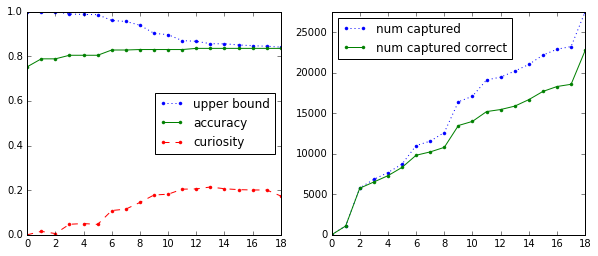

In [2]:
"""
A rule list from the latest sbrl R pkg :

    sbrl_model <- sbrl(data, iters=20000, pos_sign="1", neg_sign="0", rule_minlen=1, rule_maxlen=2, minsupport_pos=0.10, minsupport_neg=0.10, lambda=20.0, eta=1.0, nchain=25)
    print(sbrl_model)

The rules list is : 

    If      {capital.gain=7298LessThancapital-gain} (rule[46]) then positive probability = 0.01617922
    else if {education=Grad-school,marital.status=Married} (rule[76]) then positive probability = 0.24616368
    else if {age=Young,marital.status=Never-married} (rule[36]) then positive probability = 0.99606078
    else if {age=Young,capital.loss=capital-lossEQ0} (rule[34]) then positive probability = 0.92338388
    else if {education=Bachelors,marital.status=Married} (rule[68]) then positive probability = 0.33762434
    else if {marital.status=Married,occupation=Exec-managerial} (rule[123]) then positive probability = 0.46758105
    else if {education=HS-grad,marital.status=Married} (rule[85]) then positive probability = 0.70224325
    else if {education=Some-college,marital.status=Married} (rule[98]) then positive probability = 0.58744545
    else if {relationship=Own-child,hours.per.week=Full-time} (rule[224]) then positive probability = 0.98528471
    else if {marital.status=Married,occupation=Prof-specialty} (rule[124]) then positive probability = 0.27289720
    else if {education=Assoc-degree,marital.status=Married} (rule[59]) then positive probability = 0.57581069
    else if {capital.loss=capital-lossEQ0,hours.per.week=Part-time} (rule[55]) then positive probability = 0.98307380
    else if {occupation=Other-service,capital.loss=capital-lossEQ0} (rule[172]) then positive probability = 0.97980381
    else if {occupation=Prof-specialty,sex=Male} (rule[183]) then positive probability = 0.73821990
    else if {occupation=Adm-clerical,sex=Female} (rule[154]) then positive probability = 0.98090186
    else if {occupation=Prof-specialty} (rule[184]) then positive probability = 0.86271186
    else if {age=Middle-aged,education=HS-grad} (rule[4]) then positive probability = 0.96911197
    else if {education=Grad-school} (rule[81]) then positive probability = 0.61656442
    else if {age=Middle-aged,hours.per.week=Full-time} (rule[6]) then positive probability = 0.94713161
    else if {education=Bachelors,native.country=N-America} (rule[69]) then positive probability = 0.73352034
    else if {sex=Male,native.country=N-America} (rule[244]) then positive probability = 0.86269540
    else  (default rule)  then positive probability = 0.94477711

Elaine seems to have a slightly different rule list, without a rule for `{occupation=Adm-clerical,sex=Female}`,
so we stop there.

"""
prefix = (45, 35, 77, 33, 134, 69, 68, 121, 86, 82, 97, 122, 59, 113, 210, 181, 166, 257)
given_prefix(prefix, cache, rules, ones, ndata, max_accuracy=max_accuracy)
viz.prefix_trace(prefix, cache, rule_names, ndata)

In [ ]:
"""
There is another example rule list in our earlier paper http://arxiv.org/pdf/1602.08610v1.pdf on page 3:

    if capital-gain>$7298.00 then probability to make over 50K = 0.986 
    else if Young,Never-married, then probability to make over 50K = 0.003 
    else if Grad-school,Married, then probability to make over 50K = 0.748 
    else if Young,capital-loss=0, then probability to make over 50K = 0.072 
    else if Own-child,Never-married, then probability to make over 50K = 0.015 
    else if Bachelors,Married, then probability to make over 50K = 0.655 
    else if Bachelors,Over-time, then probability to make over 50K = 0.255 
    else if Exec-managerial,Married, then probability to make over 50K = 0.531 
    else if Married,HS-grad, then probability to make over 50K = 0.300 
    else if Grad-school, then probability to make over 50K = 0.266 
    else if Some-college,Married, then probability to make over 50K = 0.410 
    else if Prof-specialty,Married, then probability to make over 50K = 0.713 
    else if Assoc-degree,Married, then probability to make over 50K = 0.420 
    else if Part-time, then probability to make over 50K = 0.013 
    else if Husband, then probability to make over 50K = 0.126 
    else if Prof-specialty, then probability to make over 50K = 0.148 
    else if Exec-managerial,Male, then probability to make over 50K = 0.193 
    else if Full-time,Private, then probability to make over 50K = 0.026 
    else (default rule) then probability to make over 50K = 0.066

"""
prefix = (45, 77, 35, 33, 69, 121, 86, 97, 221, 122, 59, 54, 169, 180)

given_prefix(prefix, cache, rules, ones, ndata, max_accuracy=max_accuracy)
viz.prefix_trace(prefix, cache, rule_names, ndata)